<a href="https://colab.research.google.com/github/AnitaKirkovska/Machine_Learning_Class/blob/master/HW2/My_Solutions/CIFAR10_Architecture_v2_15epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Second CNN with Dropout**



1.   Conv2D + Relu + Conv2D + Relu + Maxpool
2.   Conv2D + Relu + Conv2D + Relu + Maxpool

Dropout(0.25) and Dropout (0.5) after Flatten()


**Loading the CIFAR10 set**

In [1]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

Using TensorFlow backend.


**Preparing data**

Training/Validation 80%/20%


In [2]:
import sklearn.model_selection as skl 

train_images, val_images, train_labels, val_labels = skl.train_test_split(train_images, train_labels, test_size=0.20)

print("train images",train_images.shape)
print("val images",val_images.shape)

train images (40000, 32, 32, 3)
val images (10000, 32, 32, 3)


**Preprocess the data**

In [0]:
from keras.utils import to_categorical

train_images = train_images.astype('float32')/255
val_images = val_images.astype('float32')/255

train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

**The Architecture**

In [9]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 10, 10, 256)       295168    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 256)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 256)         0         
__________

**Compiling the model**

In [0]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'])

**Training the model**

In [11]:
history = model.fit(train_images,
          train_labels,
          batch_size=128,
          epochs = 15,
          validation_data=(val_images, val_labels))

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 15s 367us/step - loss: 1.8894 - acc: 0.3230 - val_loss: 1.5766 - val_acc: 0.4273
Epoch 2/15
40000/40000 [==============================] - 12s 311us/step - loss: 1.3282 - acc: 0.5304 - val_loss: 1.1609 - val_acc: 0.5933
Epoch 3/15
40000/40000 [==============================] - 12s 311us/step - loss: 1.0850 - acc: 0.6198 - val_loss: 0.9641 - val_acc: 0.6678
Epoch 4/15
40000/40000 [==============================] - 12s 311us/step - loss: 0.9248 - acc: 0.6778 - val_loss: 0.8951 - val_acc: 0.6981
Epoch 5/15
40000/40000 [==============================] - 12s 312us/step - loss: 0.8106 - acc: 0.7161 - val_loss: 0.8340 - val_acc: 0.7226
Epoch 6/15
40000/40000 [==============================] - 12s 311us/step - loss: 0.7250 - acc: 0.7472 - val_loss: 0.7585 - val_acc: 0.7372
Epoch 7/15
40000/40000 [==============================] - 12s 310us/

**Plotting the model**

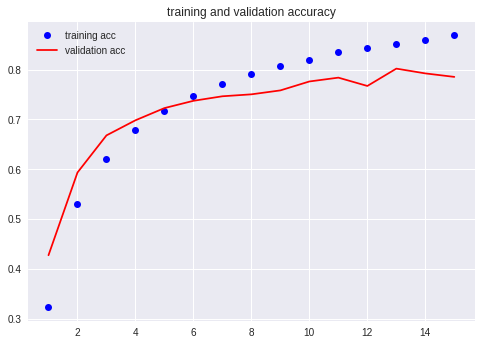

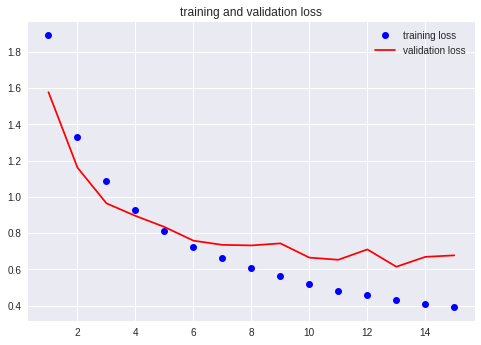

In [12]:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', 
         label='training acc')
plt.plot(epochs, val_acc, 'r', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('training and validation loss')

plt.legend()

plt.show()

**Evaluate the model with validation set**

In [13]:

score = model.evaluate(val_images, val_labels, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1]*100,"%")

Validation loss: 0.6774207529067993
Validation accuracy: 78.52 %
